## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from scipy import stats

In [41]:
data = pd.read_csv('credit_scoring_eng.csv')

#general information of the data
print(data.info())
print()

FileNotFoundError: [Errno 2] File b'credit_scoring_eng.csv' does not exist: b'credit_scoring_eng.csv'

In [2]:
#visual checking last or first values of the data
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In the interest of analyzing data for errors I decide to separate variable into two groups: categorical and numerical
categorical data - Descriptive data containing a small number of values inside - from 2 to 20 approximately values.
numerical - Quantitative characteristics of the client, for the analysis of which average measures are used

In [3]:
#lets check numerical variables
print("Numerical variables:")
print()

#let's look of NAns present in var's where observations are less than in other variables
print('NA`s in variables:')
print(data[['total_income', 'days_employed']].isna().count())
print()

#obviouse problem was mentioned in variable 'days_employed'
#find the percent of the garbage data in problem variable 'days_emplyed'
print("- Percent of the garbage data in problem variable 'days_emplyed': {:.2%}".format(
    data['days_employed'][data['days_employed'] < 0].count() / data['days_employed'].count()))

#conseder other numeric vars "dob_years"
#let's see how many customers of different ages
#print(data['dob_years'].value_counts().sort_values(ascending=False))
#investigation shown that we have zero-age clients. This is an error. Lets count how much of them. 
print('- There are {} zero-age clients, and {} less-than-zero-age in "dob_years" variable'.format(
    data['dob_years'][data['dob_years'] == 0].count(), 
    data['dob_years'][data['dob_years'] < 0].count()))

#conseder other numeric vars "total_income"
print('- There are {} observations in total (it`s less than observations in the entire data becouse of NA`s), {} - zero-income clients, and {} less-than-zero-income in "total_income" variable (looks fine)'.format(
    data['total_income'].count(),
    data['total_income'][data['total_income'] == 0].count(),
    data['total_income'][data['total_income'] < 0].count()))
print()
#data in 'total_income' var looks fine

Numerical variables:

NA`s in variables:
total_income     21525
days_employed    21525
dtype: int64

- Percent of the garbage data in problem variable 'days_emplyed': 82.20%
- There are 101 zero-age clients, and 0 less-than-zero-age in "dob_years" variable
- There are 19351 observations in total (it`s less than observations in the entire data becouse of NA`s), 0 - zero-income clients, and 0 less-than-zero-income in "total_income" variable (looks fine)



In [4]:
#consider categorical variables separately
print("Categorical variables:")
print()

#print(data['children'].value_counts())
print('- There are {} observations in total, {} - 20 childrens, and {} -1 in "children" variable'.format(
    data['children'].count(),
    data['children'][data['children'] == 20].count(),
    data['children'][data['children'] < 0].count()))
print()

#print(data['education'].value_counts())
#print()
#seen case-sensitively duplicates 

#print(data['family_status'].value_counts())
#print()
#everything fine with this data 

#print(data['gender'].value_counts())
#print()
#seen statistically insignificant category "XNA" with one observation

#print(data['income_type'].value_counts())
#print()
#seen statistically insignificant 3 category "unemployed", "student" and "paternity / maternity leave" with less than two observation
#observation "entrepreneur" could be include to the "business" category

#print(data['debt'].value_counts())
#print()
#everything fine with this data 

#print(data['purpose'].value_counts())
#print()
#Seen a lot of different purposes. Looks like it needs unification in large groups.

Categorical variables:

- There are 21525 observations in total, 76 - 20 childrens, and 47 -1 in "children" variable



### Conclusion

It seen that we have data about 21525 people. Data containces int, float and object tipes of the 12 variables. Column 'total_income' as 'days_employed' doesn't equal to the number of observation of the other variables in the data - 19351 vs 21525. Also data errors detected by visual evaluation in column 'days_employed'. Maybe data contains more errors like this. It would be seen after investigation in the next steps.

After a deeper study of the variables individually, a number of errors were identified. 

**Missing values**
Were identify 101 zero-age clients, and 0 less-than-zero-age in "dob_years" variable. "total_income" and "days_emplyed" variables has less observations that in the data 19351 vs 21525 becouse of NA's. 

**Data type replacement**
The days_employed variable in type 'float' must be replaced with type '.int' because day is an integer. 

**Processing duplicates**
In 'education' variable seen case-sensitively duplicates. Also in "children" variable discovered 76 observetion with 20 children and 47 with -1 children. It's abnormal values. It doesn't impossible that some of the clients has 20 children, but if that were true we would see some kind of normal distribution. But it isn't observed. Instead we see huge leap from 5 to 20 children. Highly possible that in clients have 2 children instead 20, and 1 instead -1. Additional symbols is the reason of the human factor. The variable 'days_emplyed' consist 82.2% nagative values. Negative values needs deeper investigation.

**Categorizing Data**
Investigation of 'gender' variable shown statistically insignificant category "XNA" with one observation. Also in 'income_type' var seen tree statistically insignificant categories "unemployed", "student" and "paternity / maternity leave" with less than two observations. Observation "entrepreneur" could be include to the "business" category. Insignificant categories could be reduce. In the last variable 'purpose' was seen a lot of different options of purposes. It seems that they need to be unify in larger groups. A lot of nagative values, in the variable 'days_emplyed', it mean that this variable couldn't be used for analises in this form. Maybe it make sense to divide them into two groups. And finally variables such as 'days_emplyed' and 'total_income' could by unified to more general groups too.

### Step 2. Data preprocessing

### Processing missing values

In [5]:
#delete NA
data = data.fillna(value=0)

### Conclusion

Searching for the mistakes in the data, in general, I found of that two variable has less observations than others. I made an assumption that one’s has NA's. In the credit banking segment income and work experience factors has a critical meaning, so the present of NA's could relate to some personal reasons of the clients. Maybe they said unreliable info and then this info were delete from the base. I decided to replace NA with zero, because it provides an opportunity for the further stay analisis and making a segmentation. Filtering zeros is not a problem.

### Data type replacement

#### 'days_employed'

In [6]:
#convert to int
data['days_employed'] = data['days_employed'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB
None


### Conclusion

The days_employed variable in type 'float' must be replaced with type '.int' because day is an integer.
I used `.astype('int')` because it works for this data.


### Processing duplicates

#### 'children'

In [7]:
#delete '-' and '0' from 'children' variable
data.loc[data['children'] == 20, 'children'] = 2
data.loc[data['children'] == -1, 'children'] = 1
print(data['children'].value_counts().sort_values())

5        9
4       41
3      330
2     2131
1     4865
0    14149
Name: children, dtype: int64


#### 'days_employed'

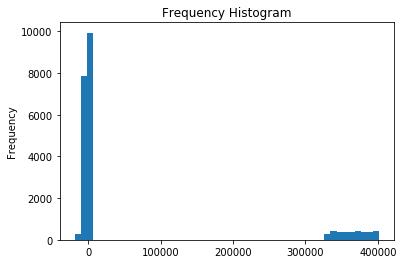

In [8]:
# let's investigate 'days_employed' variable deeply. Particularly the nature of negative values.
# Build histogram to see wich destribution observatioins has
plt.hist(data['days_employed'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
print()

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8049753308296204, 0.0)

range: min - 24.00, max - 18388.00


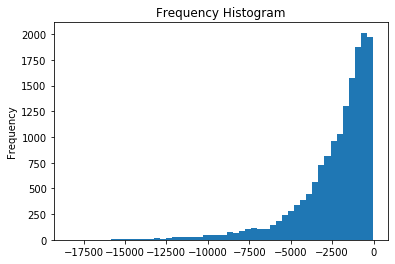

In [9]:
#It's seen that variable consist two groups of observations
#One group consist of 100% nembers less than zero. Values in range from 24.14 to 18388.95 days employed
#It highly possible that minuses it's only technical error, and we can easily cut them.
plt.hist(data['days_employed'][data['days_employed'] < 0], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
print(stats.shapiro(data['days_employed'][data['days_employed'] < 0].abs()))
print()
print('range: min - {:.2f}, max - {:.2f}'.format(
    data['days_employed'][data['days_employed'] < 0].abs().min(),
    data['days_employed'][data['days_employed'] < 0].abs().max()))

(0.9549498558044434, 2.2879530521806e-31)

range: min - 328728.00, max - 401755.00


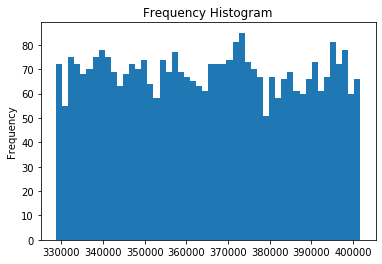

In [10]:
#The second group consist values in range from from 328 728.72, to 401 755.40 days employed
plt.hist(data['days_employed'][data['days_employed'] > 0], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
print(stats.shapiro(data['days_employed'][data['days_employed'] > 0].abs()))
print()
print('range: min - {:.2f}, max - {:.2f}'.format(
    data['days_employed'][data['days_employed'] > 0].min(),
    data['days_employed'][data['days_employed'] > 0].max()))

In [11]:
#Discovering the percent of observations in groups
print("Percent of observations in groups in variable 'days_emplyed': {:.2%} - <0; {:.2%} - 0; {:.2%} - >0".format(
    data['days_employed'][data['days_employed'] < 0].count() / data['days_employed'].count(),
    data['days_employed'][data['days_employed'] == 0].count() / data['days_employed'].count(),
    data['days_employed'][data['days_employed'] > 0].count() / data['days_employed'].count()))
print()

#let's delete minus symbol as a result of a technical issue
data['days_employed'] = data['days_employed'].abs()

Percent of observations in groups in variable 'days_emplyed': 73.90% - <0; 10.10% - 0; 16.00% - >0



#### 'education'

In [12]:
#reducing case to the low level for the all types of education
data['education'] = data['education'].str.lower()
data['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

### Conclusion

To testing data for an errors or duplicates I used ".value_counts()" method. It's good function for variables which consist not too much values. I find that 'children', 'education' and 'days_employed' data consists some mistakes. It's highly possible, that in 'children' and 'education' vars has a human factor error - cases-sensitively errors and extra symbols. 
For investigation of the negative values for 'days_employed' variable I decided to check if data in the var consistent or not. For this I built histogram, and surprisely discovered two set of data. And, expectedly, one of the sets was with negative values. It's point to the some systematically emerged error. So I decided to delete extra symbol "-" for all set by applying function "abs()". 

### Categorizing Data

#### 'days_employed'

In [13]:
#divide the data in var 'days_employed' into three groups 'youths' 'veterans' and 'NA'
#values for separetion:
#print(data['days_employed'][data['days_employed'] < 0].abs().max())
#print(data['days_employed'][data['days_employed'] > 0].abs().min())

def employed_fun(day):
    if 0 < day < 18390:
        return 'youths'
    if day > 328727:
        return 'veterans'
    if day == 0:
        return 'NA'
    return 'Not a number'
    
data['employed_satus'] = data['days_employed'].apply(employed_fun)
print(data['employed_satus'].value_counts())

youths      15906
veterans     3445
NA           2174
Name: employed_satus, dtype: int64


#### 'total_income'

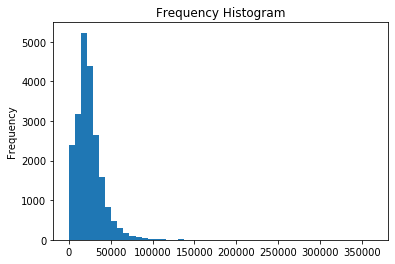

In [14]:
#lets chek var 'total_income' of clients
plt.hist(data['total_income'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
#as seen destribution doesn't shown any visible groups

In [15]:
#lets look how much observations in in approximate groups. I used an average salary 50k in SPb, Russia
print(data[data['total_income'] < 50000]['total_income'].value_counts(bins=3))
print(data[data['total_income'] > 50000]['total_income'].value_counts(bins=3))

#building a function for creating a new grouping variable 'income_group'
def income_fun(amount):
    if amount <= 20000:
        return "poor"
    if 20000 < amount <= 40000:
        return "lower_middle"
    if 40000 < amount <= 65000:
        return "middle"
    if 65000 < amount:
        return "higher_middle"
    return "NA"

#applying funtion to the data            
data['income_group'] = data['total_income'].apply(income_fun)
print(data['income_group'].value_counts())

(16662.779, 33325.557]    9810
(-49.989, 16662.779]      7134
(33325.557, 49988.336]    3261
Name: total_income, dtype: int64
(49699.531, 154173.56]      1293
(154173.56, 258335.102]       22
(258335.102, 362496.645]       5
Name: total_income, dtype: int64
poor             9543
lower_middle     9170
middle           2318
higher_middle     494
Name: income_group, dtype: int64


#### 'income_type'

In [16]:
#let's combine the meaning of “entrepreneur” on “business”
data.loc[data['income_type'] == 'entrepreneur', 'income_type'] = 'business'
#Delete insignificant "unemployed", "paternity / maternity leave" and "student"
data = data.drop(data[data.income_type == "unemployed"].index)
data = data.drop(data[data.income_type == "paternity / maternity leave"].index)
data = data.drop(data[data.income_type == "student"].index)

print(data['income_type'].value_counts())

employee         11119
business          5087
retiree           3856
civil servant     1459
Name: income_type, dtype: int64


#### 'gender'

In [17]:
data = data.drop(data[data.gender == "XNA"].index)
data['gender'].value_counts()

F    14234
M     7286
Name: gender, dtype: int64

#### 'purpose'

In [18]:
#look to the variable 'purpse' closly and find counting by meaning values
data['purpose'].value_counts()

#As seen there are many. Let's getered output in a list for stemming
purpose_dict = dict(data['purpose'].value_counts())
purpose_names = []
for name in purpose_dict:
    purpose_names.append(name)

print(purpose_names)
print()
print()

# Creating a list of most common stems from the previously created list of proposes
import nltk
from nltk.stem import SnowballStemmer

stemmed_word = []
english_stemmer = SnowballStemmer('english')
for purpose in purpose_names:
    for word in purpose.split():
        stemmed_word.append(english_stemmer.stem(word))
        
from collections import Counter
print(Counter(stemmed_word).most_common())

['wedding ceremony', 'having a wedding', 'to have a wedding', 'real estate transactions', 'buy commercial real estate', 'housing transactions', 'buying property for renting out', 'transactions with commercial real estate', 'purchase of the house', 'housing', 'purchase of the house for my family', 'property', 'construction of own property', 'transactions with my real estate', 'building a real estate', 'buy real estate', 'building a property', 'purchase of my own house', 'housing renovation', 'buy residential real estate', 'buying my own car', 'going to university', 'car', 'second-hand car purchase', 'to own a car', 'buying a second-hand car', 'cars', 'to buy a car', 'supplementary education', 'car purchase', 'purchase of a car', 'university education', 'to get a supplementary education', 'education', 'getting an education', 'profile education', 'getting higher education', 'to become educated']


[('a', 9), ('car', 9), ('educ', 8), ('real', 7), ('estat', 7), ('buy', 7), ('to', 6), ('hous

In [19]:
#building a function for creating a new grouping variable 'purpose_group' based on var 'purpose'
def purpose_fun(purpose_names):
    for word in purpose_names.split():
        stemmed_word = english_stemmer.stem(word)
        if stemmed_word == 'car':
            return "car" 
        if stemmed_word == 'educ':
            return "education"
        if stemmed_word == 'univers':
            return "education"
        if stemmed_word == 'transact':
            return "commercial"
        if stemmed_word == 'rent':
            return "commercial"
        if stemmed_word == 'commerci':
            return "commercial"
        if stemmed_word == 'wed':
            return "wedding"

#applying funtion to the data            
data['purpose_group'] = data['purpose'].apply(purpose_fun)
data['purpose_group'] = data['purpose_group'].fillna(value='real estate')

#Сheking for NA's
print(data['purpose'][data['purpose_group'].isna()].value_counts())
print()

#looking how much observations per any variable
print(data['purpose_group'].value_counts())
print()

#Checking the correct distribution of values into groups 
data_pivot = data.pivot_table(
index=['purpose_group', 'purpose'],
values='total_income', 
aggfunc='count')
print(data_pivot)
print()

#data2.groupby('purpose_group')['purpose'].count()

Series([], Name: purpose, dtype: int64)

real estate    6910
car            4314
education      4022
commercial     3926
wedding        2348
Name: purpose_group, dtype: int64

                                                        total_income
purpose_group purpose                                               
car           buying a second-hand car                           479
              buying my own car                                  505
              car                                                494
              car purchase                                       462
              cars                                               478
              purchase of a car                                  455
              second-hand car purchase                           489
              to buy a car                                       472
              to own a car                                       480
commercial    buy commercial real estate                         

In [20]:
#let's look if everything fine
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21520 entries, 0 to 21524
Data columns (total 15 columns):
children            21520 non-null int64
days_employed       21520 non-null int64
dob_years           21520 non-null int64
education           21520 non-null object
education_id        21520 non-null int64
family_status       21520 non-null object
family_status_id    21520 non-null int64
gender              21520 non-null object
income_type         21520 non-null object
debt                21520 non-null int64
total_income        21520 non-null float64
purpose             21520 non-null object
employed_satus      21520 non-null object
income_group        21520 non-null object
purpose_group       21520 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 2.6+ MB


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
employed_satus      0
income_group        0
purpose_group       0
dtype: int64

### Conclusion

On the previous step I found two groups inside value **'days_employed'**. Then I decided to split it into three groups *'youths'* *'veterans'* and *'NA'*. Group 'NA' is equal to the zero. I used this name because zero means absent of the information.
I discovered **'total_income'** by using histogram but as seen distribution doesn't show any visible groups. But further analysis required to divide this variable to the groups. I decided to create a groups, grounded on expert knowledge about minimum income, average and high salary. Last affected var was **'gender'**, I cut out only one value, because it couldn't give us significant information. In the last variable **'purpose'** was seen a lot of different options of purposes. It seems that they need to be unify in larger groups. First I found grouping values by using stem method. It's easiest then lennomination and good enough for this task. So I revealed: *wedding* - wed; *commercial* - transact, rent, commerci; *car* - car; *education* - educ, univers; *real estate* - for the rest. By creating new function, I made a new variable. It wasn't easy to redistribute values of **'purpose'** among grouping values. Because some words are found in several values at once. Pivot table helped me in solving this problem. 

### Step 3. Answer these questions

### - Is there a relation between having kids and repaying a loan on time?

In [21]:
data_pivot = data.pivot_table(
index=['children'],
columns='debt',
values='family_status_id', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt            0       1      ratio
children                            
4            37.0     4.0  10.810811
2          1929.0   201.0  10.419907
1          4420.0   444.0  10.045249
3           303.0    27.0   8.910891
0         13083.0  1063.0   8.125048
5             9.0     NaN        NaN


### Conclusion

Families without children and with three children repay debts better. But in a group with three children, there are too few observations and they may be insignificant. As a conclusion - families with children repay debts worse.

### - Is there a relation between marital status and repaying a loan on time?

In [22]:
data_pivot = data.pivot_table(
index=['family_status'],
columns='debt',
values='family_status_id', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt                   0    1      ratio
family_status                           
unmarried           2538  274  10.795902
civil partnership   3787  388  10.245577
married            11449  929   8.114246
divorced            1110   85   7.657658
widow / widower      897   63   7.023411


### Conclusion

Unmarried and divorced repaying loans worse than married. The best payers are divorced and widowers / widows

### - Is there a relation between income level and repaying a loan on time?

In [23]:
data_pivot = data.pivot_table(
index=['income_group'],
columns='debt',
values='family_status_id', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt              0    1     ratio
income_group                      
lower_middle   8399  769  9.155852
poor           8764  776  8.854404
middle         2153  165  7.663725
higher_middle   465   29  6.236559


In [33]:
# let's try to rebuild our groups to know if we could get data with another proportion of repay a loan
def income_fun(amount):
    if amount <= 20000:
        return "poor"
    if 20000 < amount <= 40000:
        return "lower_middle"
    if 40000 < amount <= 125000:
        return "middle"
    if 125000 < amount:
        return "higher_middle"
    return "NA"

#applying funtion to the data            
data['income_group'] = data['total_income'].apply(income_fun)
print(data['income_group'].value_counts())

poor             9540
lower_middle     9168
middle           2768
higher_middle      44
Name: income_group, dtype: int64


In [34]:
#build another data pivot
data_pivot = data.pivot_table(
index=['income_group'],
columns='debt',
values='family_status_id', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt              0    1      ratio
income_group                       
higher_middle    40    4  10.000000
lower_middle   8399  769   9.155852
poor           8764  776   8.854404
middle         2578  190   7.370054


### Conclusion

Observed interesting results. First data groping variant showed as expected, that the richer clients the better chance to repay a loan. But after shifting upper limit, ratio of probability changed for rich people. It shows that people with high income worse repay loan the poorest clients. Only one important think require high attention. The total amount of people in 'higher_middle' group is 44. It's not enough for comparison with another large groups. This conclusion has to be verified on larger data. 

### - How do different loan purposes affect on-time repayment of the loan?

In [26]:
data_pivot = data.pivot_table(
index=['purpose_group'],
columns='debt',
values='total_income', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt              0    1      ratio
purpose_group                      
car            3912  402  10.276074
education      3652  370  10.131435
wedding        2162  186   8.603145
commercial     3623  303   8.363235
real estate    6432  478   7.431592


### Conclusion

A loan for real estate, both for life and business, is better repaid than for a car or education. Interestingly, the wedding loans only a little worse repaid than real estate loans.

### - Is there education level affect on-time repayment of the loan?

In [37]:
data_pivot = data.pivot_table(
index=['education'],
columns='debt',
values='total_income', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt                       0       1      ratio
education                                      
primary education      251.0    31.0  12.350598
some college           675.0    68.0  10.074074
secondary education  13869.0  1362.0   9.820463
bachelor's degree     4980.0   278.0   5.582329
graduate degree          6.0     NaN        NaN


### Conclusion

Very interesting and seems significant results getting from education data of the clients. The educated clients the better chance to repay loan.

### - Is there a relation between employed status and repaying a loan?

In [38]:
data_pivot = data.pivot_table(
index=['employed_satus'],
columns='debt',
values='total_income', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt                0     1     ratio
employed_satus                       
youths          14515  1388  9.562522
NA               2004   170  8.483034
veterans         3262   181  5.548743


### Conclusion

Also interesting and significant results. People who have dramatically more work experience days - starting from 328727 days - has much more chances to repay loan.

### - Is there a relation between the customer’s income type and repaying a loan?

In [39]:
data_pivot = data.pivot_table(
index=['income_type'],
columns='debt',
values='total_income', 
aggfunc='count')

data_pivot['ratio'] = data_pivot[1]/data_pivot[0]*100
print(data_pivot.sort_values(by='ratio', ascending=False))

debt               0     1      ratio
income_type                          
employee       10058  1061  10.548817
business        4710   376   7.983015
civil servant   1373    86   6.263656
retiree         3640   216   5.934066


### Conclusion

As seen from the data, people on retirement better repaying loan, as much as civil servants. Business repays loans little worse. The worst loan payers is employes.

### Step 4. General conclusion

Has been analyzed large amount of data consists information about clients who have some relations with bank debt. The data provided had some errors and inaccuracies which required to deal with them. I made data suitable for analysis by applying a number of functions. 

Here some preliminary results. Can be primarily designated further hypothesis according to the chances to repay a loan:

1. existence of the children decries chances to repay a loan
2. (marriage/divorced/widow(er)) status is increase chances to repay a loan;
3. rich and middle class repay loans better the poor and lower-middle class;
4. loan for auto and education repaying worse, than loans for wedding, commers or real estate costs;
5. the educated clients the better chance to repay loan;
6. clients with more experience has more chances to repay loan;
7. retired, servants and business is better loan payers than employes.

Import to remember that results don’t show causation only some correlation between variables. For discovered deeper results, with structural relations and causations among data, more serious statistical analysis required.

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  an explanation of which missing value types were detected;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  replaced the real data type with an integer;
- [ ]  an explanation of which method is used to change the data type and why;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  description of the possible reasons for the appearance of duplicates in the data;
- [ ]  data is categorized;
- [ ]  an explanation of the principle of data categorization;
- [ ]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [ ]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [ ]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [ ]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.